# COVID 19 Vaccines

This notebook is to practice storytelling skills using COVID-19 vaccines dataset from [The Milken Institute's FasterCures project](https://covid-19tracker.milkeninstitute.org/#about). 

Main questions:
* How many vaccines have been tracked?
* What platforms have been used to build vaccines?
* What phases are the vaccines in?


In [1]:
# load basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load dataset
vac = pd.read_csv('COVID-19 Tracker-Vaccines.csv')

In [3]:
vac.head()

,Developer / Researcher,Treatment vs. Vaccine,Product Category,Stage of Development,Anticipated Next Steps,Product Description,Clinical Trials for COVID-19,Funder,Published Results,Clinical Trials for Other Diseases (T only) / Related Use or Platform (V only),FDA-Approved Indications,Sources,Date Last Updated
0,"Genexine Consortium (GenNBio, International Va...",Vaccine,DNA-based,Phase I/II,Phase I/II study: Phase I began end of June 20...,DNA; (GX-19),NCT04445389,Unknown,NaN,NaN,NaN,https://docs.google.com/document/d/1Y4nCJJ4njz...,9/29/2020
1,Inovio Pharmaceuticals/ Beijing Advaccine Biot...,Vaccine,DNA-based,Phase I/II,FDA partial clinical hold for planned Phase II...,DNA; (INO-4800) plasmid vaccine with electropo...,"NCT04336410, NCT04447781",Coalition for Epidemic Preparedness (CEPI) / G...,Inovio (http://ir.inovio.com/news-releases/new...,Same platform as multiple vaccine candidates,NaN,https://docs.google.com/document/d/1Y4nCJJ4njz...,9/28/2020
2,Osaka University/ AnGes/ Takara Bio/ Cytiva/ B...,Vaccine,DNA-based,Phase I/II,"Phase I/II began end of June 2020, results exp...",DNA; (AG0301 & AG0302) plasmid vaccine + adjuv...,"NCT04463472, NCT04527081",Unknown,NaN,NaN,NaN,https://docs.google.com/document/d/1Y4nCJJ4njz...,9/23/2020
3,Zydus Cadila Healthcare Limited,Vaccine,DNA-based,Phase I/II,Phase I/II study: Phase I began July 2020 and ...,DNA; (ZyCoV-D) plasmid vaccine,CTRI/2020/07/026352,Unknown,NaN,NaN,NaN,https://docs.google.com/document/d/1Y4nCJJ4njz...,9/23/2020
4,BioNet Asia/ Technovalia/ Vax4COVID/ The Unive...,Vaccine,DNA-based,Pre-clinical,Phase I/Ib expected to be dosed October 2020,DNA; (COVIGEN) needle-free delivery,NaN,Australian Government Medical Research Future ...,NaN,NaN,NaN,https://docs.google.com/document/d/1Y4nCJJ4njz...,10/7/2020


In [4]:
vac.dropna(how='any',axis=1,inplace=True)

In [5]:
vac['Date Last Updated'] = vac['Date Last Updated'].apply(func=lambda x: x.split()[-1])
vac['Date Last Updated'] = pd.to_datetime(vac['Date Last Updated'],format='%m/%d/%Y')

In [6]:
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Developer / Researcher  213 non-null    object        
 1   Treatment vs. Vaccine   213 non-null    object        
 2   Product Category        213 non-null    object        
 3   Stage of Development    213 non-null    object        
 4   Anticipated Next Steps  213 non-null    object        
 5   Product Description     213 non-null    object        
 6   Funder                  213 non-null    object        
 7   Sources                 213 non-null    object        
 8   Date Last Updated       213 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 15.1+ KB


In [7]:
vac['Date Last Updated'].describe()

/Users/hhl/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                     213
unique                     56
top       2020-04-20 00:00:00
freq                       41
first     2020-04-20 00:00:00
last      2020-10-09 00:00:00
Name: Date Last Updated, dtype: object

## --> As of 10/09/2020, a total of 213 vaccines have been tracked. 

# What platforms have been used to develop vaccines against COVID-19? 

In [8]:
vac['Product Category'].value_counts()

Protein subunit                 71
RNA-based vaccine               27
Non-replicating viral vector    26
Unknown                         18
Replicating viral vector        18
DNA-based                       17
Virus-like particle             16
Inactivated virus               14
Live attenuated virus            4
Replicating bacterial vector     2
Name: Product Category, dtype: int64

[Text(0, 0, 'Protein subunit'),
 Text(1, 0, 'RNA-based vaccine'),
 Text(2, 0, 'Non-replicating viral vector'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'Replicating viral vector'),
 Text(5, 0, 'DNA-based'),
 Text(6, 0, 'Virus-like particle'),
 Text(7, 0, 'Inactivated virus'),
 Text(8, 0, 'Live attenuated virus'),
 Text(9, 0, 'Replicating bacterial vector')]

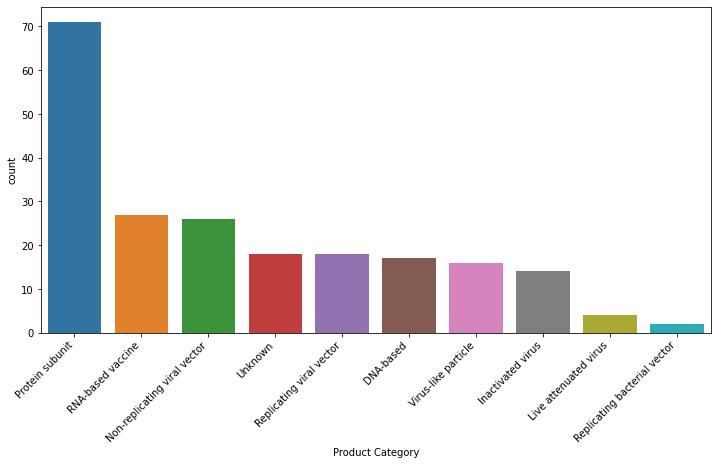

In [14]:
_, ax = plt.subplots(figsize=(12,6))
ax=sns.countplot(x='Product Category',data=vac, order = vac['Product Category'].value_counts().index, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', va='top')

# What phases are the vaccines in?

In [10]:
vac['Stage of Development'].value_counts()

Pre-clinical    178
Phase I/II       13
Phase I           9
Phase III         8
Phase II          4
Phase II/III      1
Name: Stage of Development, dtype: int64

[Text(0, 0, 'Pre-clinical'),
 Text(1, 0, 'Phase I/II'),
 Text(2, 0, 'Phase I'),
 Text(3, 0, 'Phase III'),
 Text(4, 0, 'Phase II'),
 Text(5, 0, 'Phase II/III')]

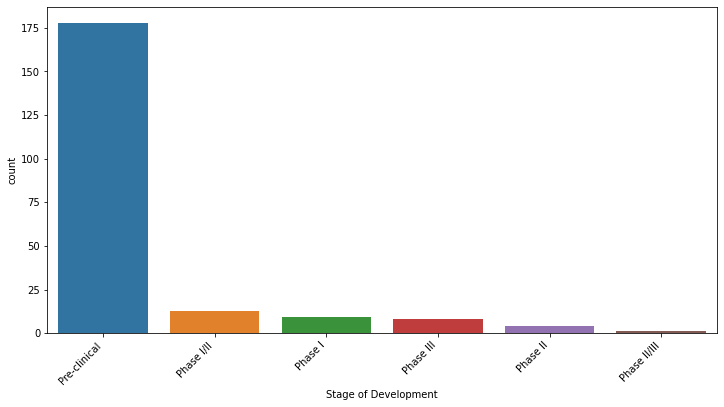

In [13]:
_, ax = plt.subplots(figsize=(12,6))
ax=sns.countplot(x='Stage of Development',data=vac, order = vac['Stage of Development'].value_counts().index, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', va='top')

# Who are the developers who have Phase III vaccines

In [16]:
Phase3 = vac.loc[vac['Stage of Development']=='Phase III',:]

In [17]:
Phase3

,Developer / Researcher,Treatment vs. Vaccine,Product Category,Stage of Development,Anticipated Next Steps,Product Description,Funder,Sources,Date Last Updated
17,Beijing Institute of Biological Products/ Sino...,Vaccine,Inactivated virus,Phase III,Phase III trial began July 2020; Received earl...,Inactivated,Unknown,https://docs.google.com/document/d/1Y4nCJJ4njz...,2020-09-28
18,Sinovac/ Instituto Butantan/ Bio Farma,Vaccine,Inactivated virus,Phase III,Received approval for Phase I/II trial in adol...,Inactivated (inactivated + alum); CoronaVac (f...,Unknown,https://docs.google.com/document/d/1Y4nCJJ4njz...,2020-09-23
19,Wuhan Institute of Biological Products/ Sinopharm,Vaccine,Inactivated virus,Phase III,Phase III trial began July 2020; Phase I/II ea...,Inactivated,Unknown,https://docs.google.com/document/d/1Y4nCJJ4njz...,2020-09-28
35,CanSino Biologics/Beijing Institute of Biotech...,Vaccine,Non-replicating viral vector,Phase III,Phase III dosed September 2020; Phase II began...,Non-replicating viral vector; Adenovirus Type ...,Unknown,https://docs.google.com/document/d/1Y4nCJJ4njz...,2020-09-22
36,Gamaleya Research Institute,Vaccine,Non-replicating viral vector,Phase III,Phase III (post-registration) trial began Sept...,"Adeno-based, Gam-COVID-Vac Lyo (Sputnik V)",Russian Direct Investment Fund (RDIF),https://docs.google.com/document/d/1Y4nCJJ4njz...,2020-09-28
37,Janssen Pharmaceutical Companies/ Beth Israel ...,Vaccine,Non-replicating viral vector,Phase III,Phase III trial (ENSEMBLE) began and study pro...,"Ad26.COV2-S, Non replicating viral vector; Ad2...",Biomedical Advanced Research and Development A...,https://docs.google.com/document/d/1Y4nCJJ4njz...,2020-09-30
38,"University of Oxford, Oxford Biomedica, Vaccin...",Vaccine,Non-replicating viral vector,Phase III,Study protocol for late-stage clinical trials ...,Non-replicating viral vector; AZD 1222 (former...,Coalition for Epidemic Preparedness Innovation...,https://docs.google.com/document/d/1Y4nCJJ4njz...,2020-10-06
150,Moderna/ NIAID/ Lonza/ Catalent/ Rovi/ Medidat...,Vaccine,RNA-based vaccine,Phase III,Study protocol for late-stage clinical trials ...,RNA; LNP-encapsulated mRNA (mRNA 1273),Coalition for Epidemic Preparedness (CEPI)/ Bi...,https://docs.google.com/document/d/1Y4nCJJ4njz...,2020-09-30
